In [2]:
%pip install numpy pandas seaborn

In [3]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [5]:


URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


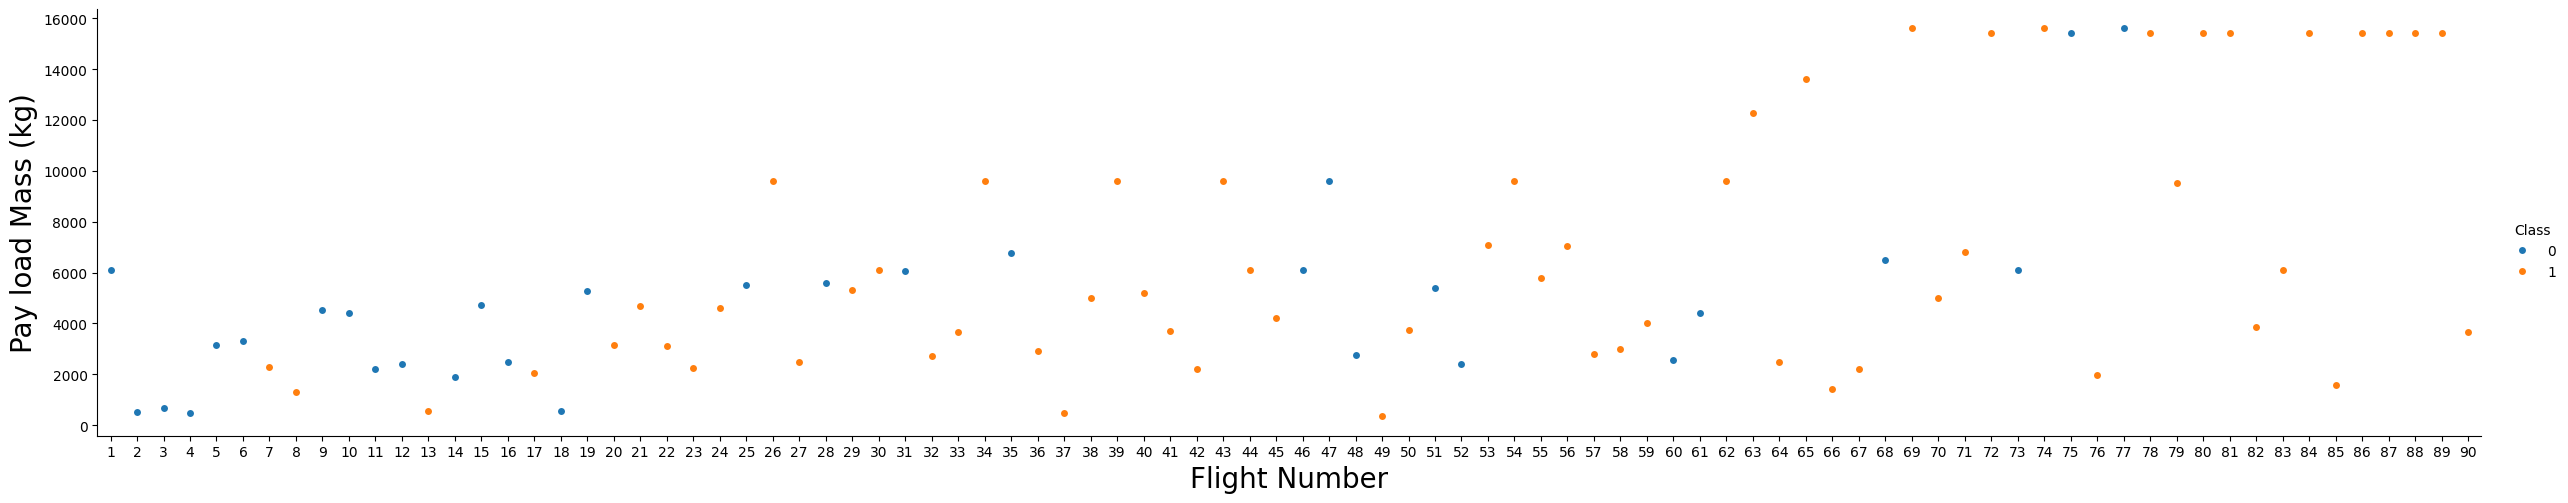

In [6]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

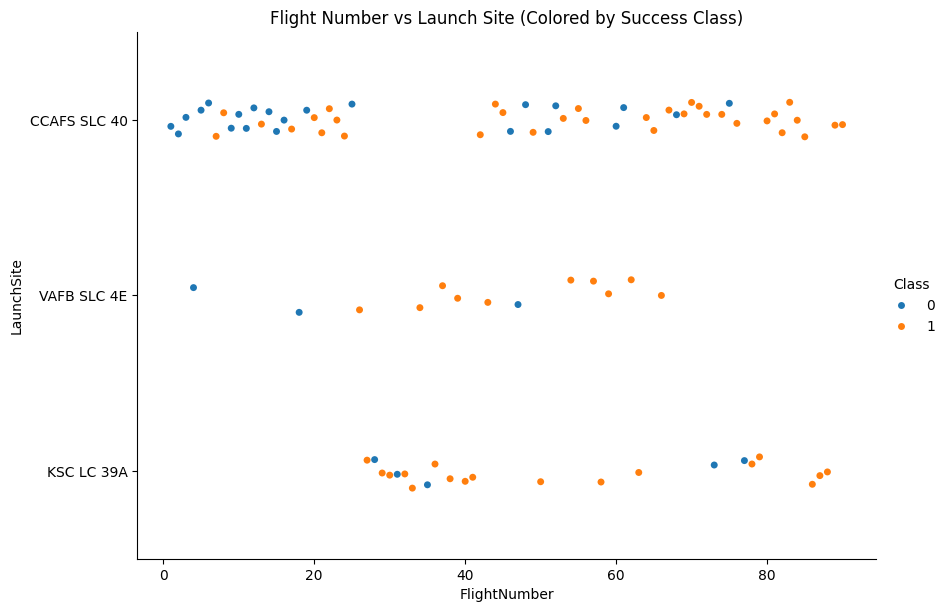

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(
    data=df,
    x='FlightNumber',
    y='LaunchSite',
    hue='Class',
    kind='strip',  # or 'swarm' for better point distribution
    height=6,
    aspect=1.5
)

plt.title('Flight Number vs Launch Site (Colored by Success Class)')
plt.show()

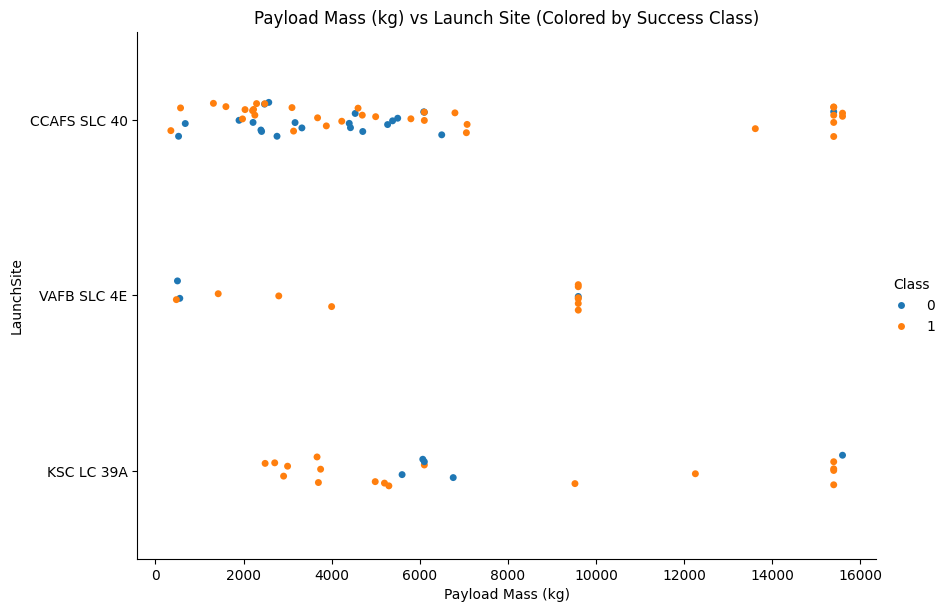

In [8]:
sns.catplot(
    data=df,
    x='PayloadMass',
    y='LaunchSite',
    hue='Class',
    kind='strip',
    height=6,
    aspect=1.5
)

plt.title('Payload Mass (kg) vs Launch Site (Colored by Success Class)')
plt.xlabel('Payload Mass (kg)')
plt.show()

/tmp/ipython-input-1246928479.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=success_rate, x='Orbit', y='SuccessRate', palette='viridis')


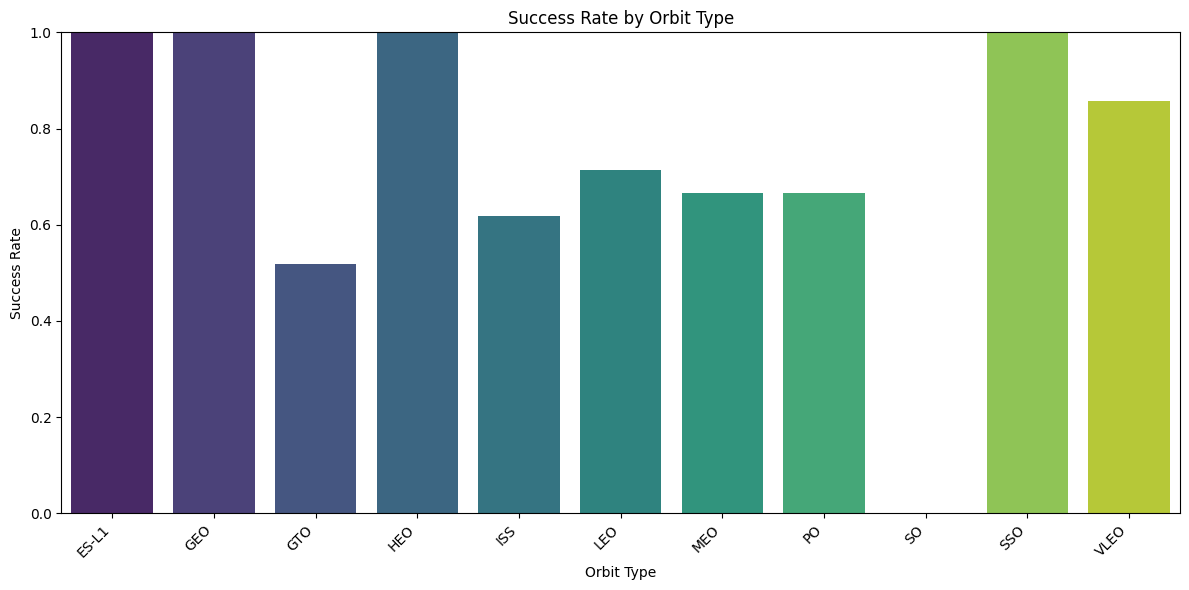

In [9]:
# Calculate success rate per orbit type
success_rate = df.groupby('Orbit')['Class'].mean().reset_index()
success_rate.rename(columns={'Class': 'SuccessRate'}, inplace=True)

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=success_rate, x='Orbit', y='SuccessRate', palette='viridis')
plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

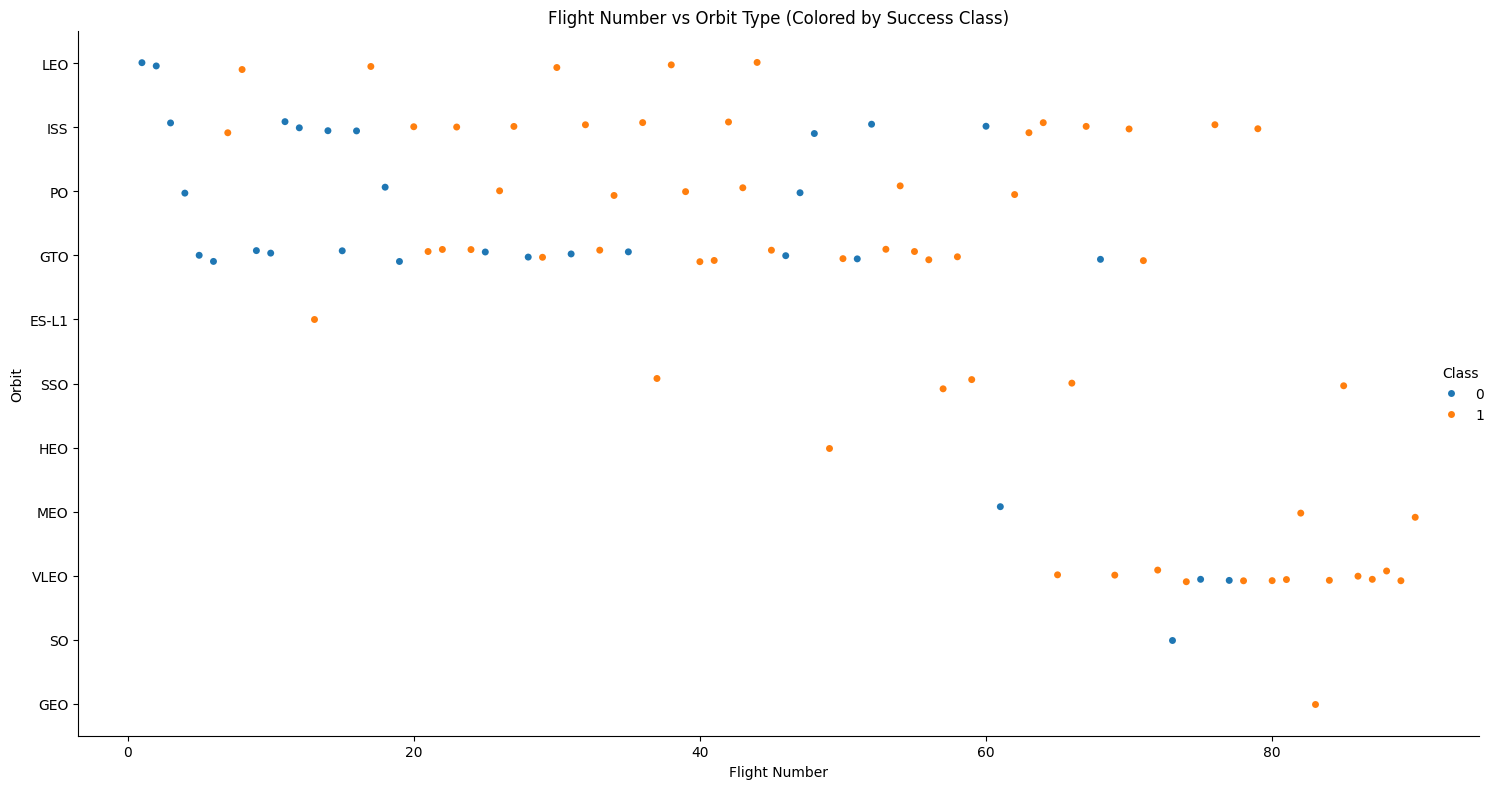

In [10]:
sns.catplot(
    data=df,
    x='FlightNumber',
    y='Orbit',
    hue='Class',
    kind='strip',
    height=8,
    aspect=1.8
)

plt.title('Flight Number vs Orbit Type (Colored by Success Class)')
plt.xlabel('Flight Number')
plt.tight_layout()
plt.show()

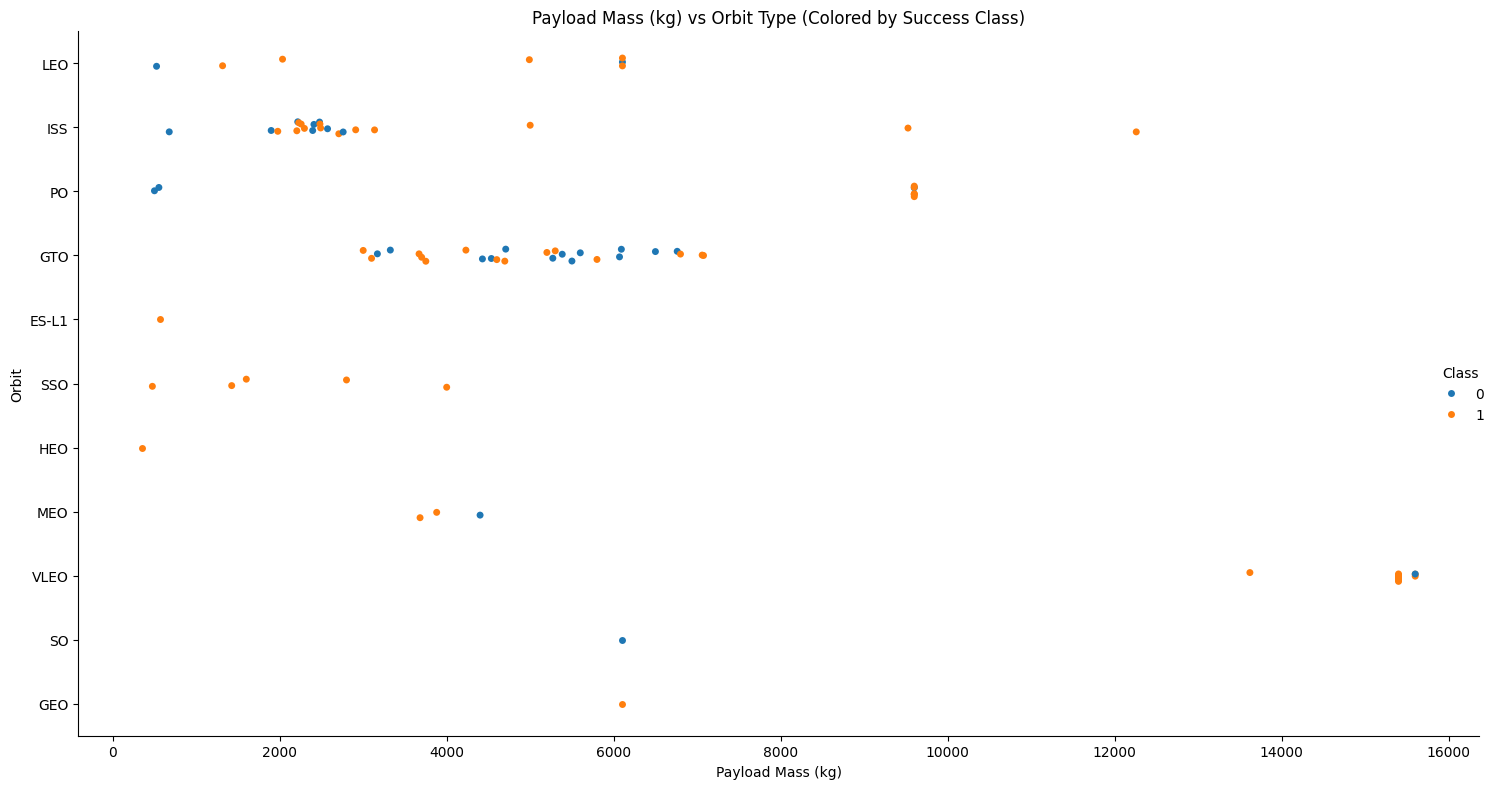

In [11]:
sns.catplot(
    data=df,
    x='PayloadMass',
    y='Orbit',
    hue='Class',
    kind='strip',
    height=8,
    aspect=1.8
)

plt.title('Payload Mass (kg) vs Orbit Type (Colored by Success Class)')
plt.xlabel('Payload Mass (kg)')
plt.tight_layout()
plt.show()

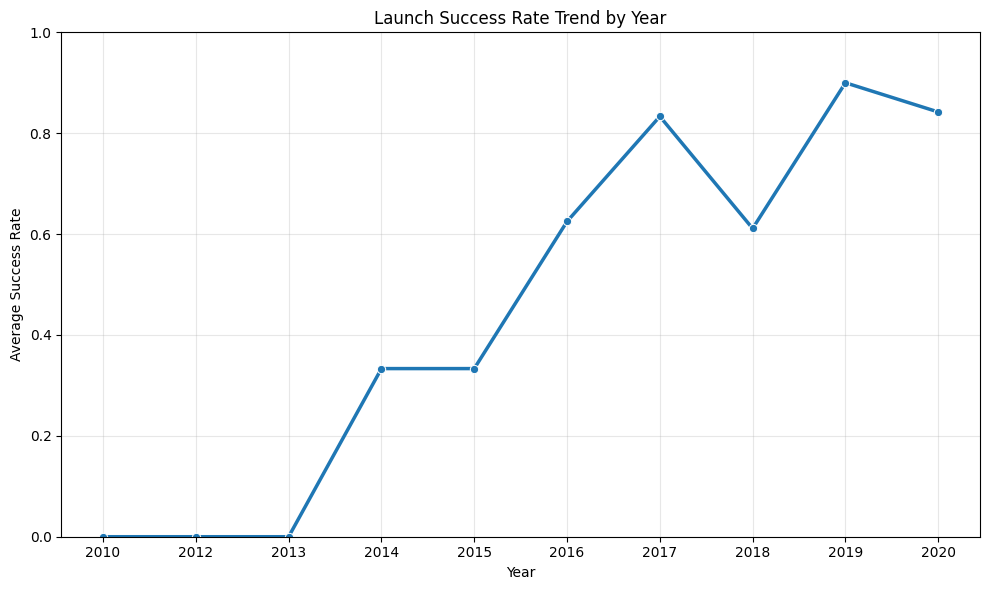

In [12]:
# A function to Extract years from the date
def Extract_year():
    year = []
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

# Apply the function to extract years
df['Year'] = Extract_year()

# Calculate average success rate per year
success_by_year = df.groupby('Year')['Class'].mean().reset_index()
success_by_year.rename(columns={'Class': 'SuccessRate'}, inplace=True)

# Plot the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=success_by_year, x='Year', y='SuccessRate', marker='o', linewidth=2.5)
plt.title('Launch Success Rate Trend by Year')
plt.xlabel('Year')
plt.ylabel('Average Success Rate')
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [13]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [14]:
# Assuming 'features' dataframe contains the categorical columns
# If not, create it from df
features = df[['Orbit', 'LaunchSite', 'LandingPad', 'Serial']].copy()

# Apply one-hot encoding
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the result
features_one_hot.head()

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
features_one_hot = features_one_hot.astype('float64')

# Verify the data types
features_one_hot.dtypes.head()

,0
Orbit_ES-L1,float64
Orbit_GEO,float64
Orbit_GTO,float64
Orbit_HEO,float64
Orbit_ISS,float64
